In [1]:
%matplotlib inline

In [2]:


import sys
sys.path.append("/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Jasons_Functions/")

from erosion_dilation_from_array import * 

from jasons_skeletonize_from_array import * 

from trim_edges import * # new_array = trim_edges(path,weight_threshold)

from erosion_dilation_from_array import *

# from generate_waypoints import *

from inverse_skeletonize_from_array import *

from overlay_images import *

from zig_zag_full_image import *


In [3]:
# erosion dilation 

# path to image
path = r'../MAPS/Map_originals/Ibrahim_Test/ibrahim_test_bw.png'
image = open_image(path)
option = 1 # 1 = erode first 2 = dialate first 
num_erosions = 4
num_dilations = 4

e_d_image  = erosion_dilation_from_array(image,option,num_erosions,num_dilations)

cv.imwrite('e_d_image.png', e_d_image)



found image at :  ../MAPS/Map_originals/Ibrahim_Test/ibrahim_test_bw.png


True

In [4]:
# skeletonize 
med_axis , skeleton , skeleton_lee , thinned , thinned_partial = jasons_skeletonize_from_array(e_d_image)

skeletons = [med_axis , skeleton , skeleton_lee , thinned]


skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected

skeleton converted to graph



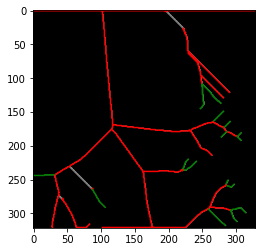


skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected

skeleton converted to graph



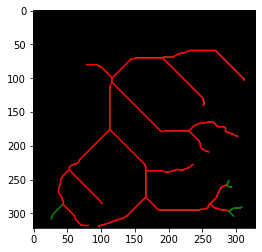


skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected

skeleton converted to graph



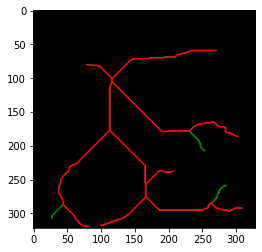


skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected

skeleton converted to graph



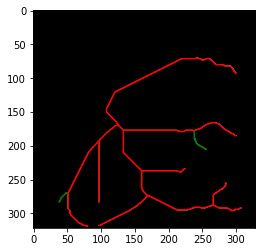

In [5]:
#try and preprocess the skeletons a bit and trim edges
trimmed_skeletons = []
weight_threshold = 42
for skel in skeletons:
    
    
    # option = 2 # 1 = erode first 2 = dialate first 
    # num_erosions = 1
    # num_dilations = 1

    # skel  = erosion_dilation_from_array(skel,option,num_erosions,num_dilations)
    # show_image(skel)
    
    cv.imwrite('temp_skel_img.png', skel)

    new_array , new_image = trim_edges('temp_skel_img.png',weight_threshold)
    trimmed_skeletons.append(new_image)

from inverse_skeletonize_from_array: eroded the negative image 1


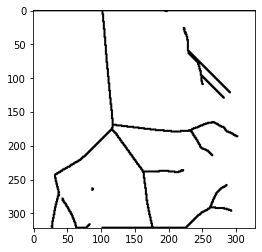

from inverse_skeletonize_from_array: eroded the negative image 1


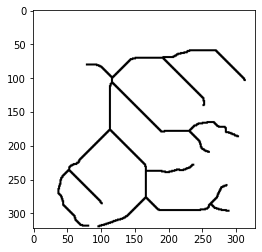

from inverse_skeletonize_from_array: eroded the negative image 1


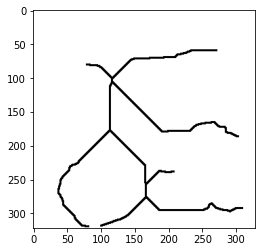

from inverse_skeletonize_from_array: eroded the negative image 1


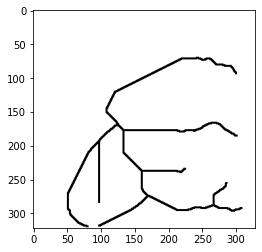

heres a skeleton


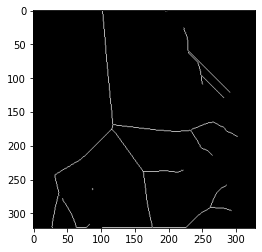

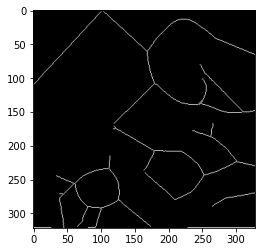

heres a skeleton


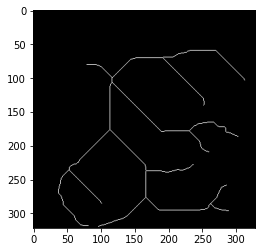

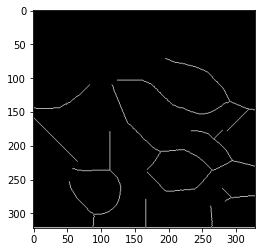

heres a skeleton


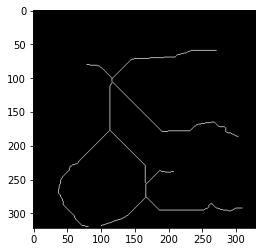

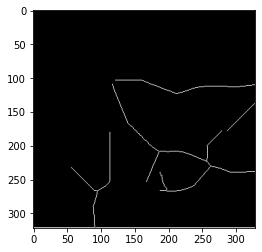

heres a skeleton


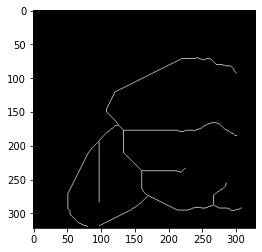

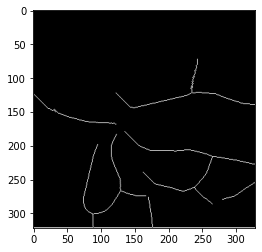

In [6]:
lotsa_inverse_skeletons = []
#inverse skeletonize trimmed graphs 
for trim_skel in trimmed_skeletons:


    med_axis , skeleton , skeleton_lee , thinned , thinned_partial = inverse_skeletonize_from_array(trim_skel)

    inverse_skeletons = [med_axis , skeleton , skeleton_lee , thinned]

    lotsa_inverse_skeletons.append(inverse_skeletons)
for i in range(0,len(lotsa_inverse_skeletons)):
    print("heres a skeleton")
    show_image(trimmed_skeletons[i])

    # for inv_skel in skels:
    #     show_image(inv_skel)
    show_image(lotsa_inverse_skeletons[i][0]>0) # --------------------------- Seems like medial axis is the only really good inverse skeleton




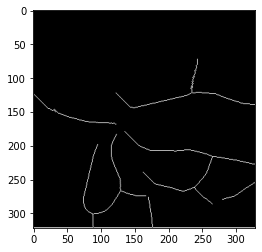

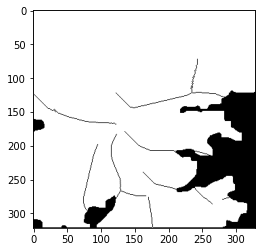

True

In [9]:

#overlay boundary and one inverse skeleton image

image1 = e_d_image

image2 = (lotsa_inverse_skeletons[3][0]>0)*255

show_image(image2)

make_negative_1 = False
make_negative_2 = True

new_image = overlay_images (image1,image2,make_negative_1, make_negative_2)

show_image(new_image)

cv2.imwrite('zig_zag_skeleton.png', trimmed_skeletons[3] )
cv2.imwrite('overlay_boundary_image.png', new_image*255 )



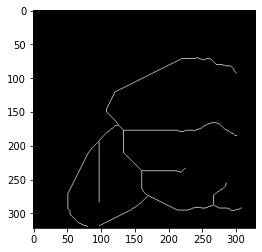

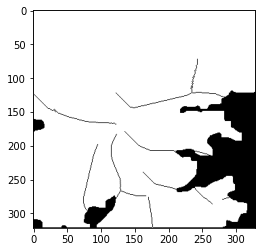


skeleton converted to graph

found image at :  ../pipelines/overlay_boundary_image.png


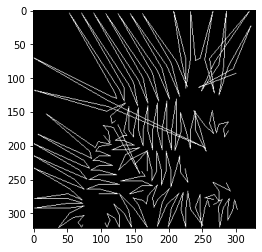

True

In [8]:
show_image(trimmed_skeletons[3])
show_image(new_image)


path_to_skeleton = r'../pipelines/zig_zag_skeleton.png' 

path_to_boundary_image = r'../pipelines/overlay_boundary_image.png'

zig_zag_width = 7

image = zig_zag_full_image ( path_to_skeleton, path_to_boundary_image, zig_zag_width) 

show_image(image)
cv2.imwrite('zigzag_full.png', image )


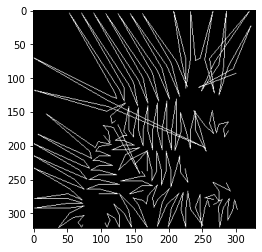

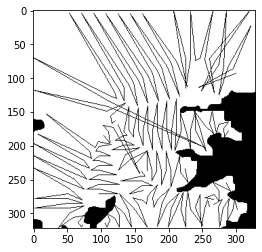

True

In [10]:
#overlay boundary and zig zag to get an idea of the coverage 

image1 = e_d_image

image2 = image

show_image(image2)

make_negative_1 = False
make_negative_2 = True

new_image = overlay_images (image1,image2,make_negative_1, make_negative_2)

show_image(new_image)

cv2.imwrite('final.png', new_image )